### Subject: Forecasting Homework: ALTO_Data_Processing
### Team: Blue team
### Date: 03/03/2023

In [1]:
!python --version

import pandas as pd
print('Pandas:', pd.__version__)

import matplotlib.pyplot as plt 
from matplotlib import __version__ as v_plt
print('matplotlib', v_plt)
import plotly.express as px

# from functools import reduce
# import statsmodels.api as sm
# from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.tools.eval_measures import rmse, meanabs, rmspe
# from sklearn.metrics import mean_absolute_percentage_error

import numpy as np
print('Numpy:', np.__version__)

import tensorflow as tf #Use pip. Ensure you have 2.11.0
!pip show tensorflow
# print('TensorFlow:', tf.VERSION)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from statsmodels.tsa.vector_ar.var_model import VAR
# from statsmodels.tsa.statespace.varmax import VARMAX

from statsmodels import __version__ as v_stm
from pyod.models.knn import KNN

print('statsmodels:', v_stm)

# PyOD library
import pyod

print('Success.')

Python 3.9.13
Pandas: 1.5.3
matplotlib 3.5.2
Numpy: 1.21.5
Name: tensorflow
Version: 2.11.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\ahmad\anaconda3_2.0\lib\site-packages
Requires: tensorflow-intel
Required-by: 


statsmodels: 0.13.2
Success.


In [2]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# load the py file with functions we created
import TSModels
from TSModels import Created_Functions

## Import Data

,Date,Orders
0,2018-01-01,1.266171
1,2018-02-01,-0.617705
2,2018-03-01,0.882906
3,2018-04-01,0.693607
4,2018-05-01,1.323791


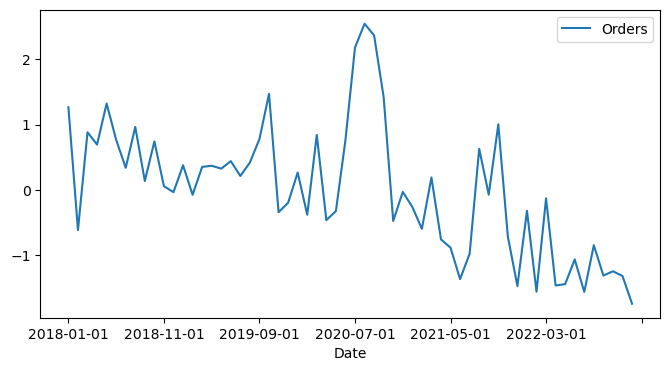

In [4]:
AltoSales = pd.read_csv('Scaled_sales_Mansfield_WH_SW_Alto_2022.csv')
AltoSales.plot.line('Date', 'Orders', figsize = (8,4))
AltoSales.head(5)

# results are showing the data has potential outliers around 30th 

In [5]:
## Convert Date into a number 
AltoSales.shape[0]                  # checking the number of "date" columns 
for d in range(AltoSales.shape[0]):
    AltoSales['Date'][d] = d
AltoSales = AltoSales.astype({'Date': 'int64'})

C:\Users\Ahmad\AppData\Local\Temp\ipykernel_27484\2075988115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AltoSales['Date'][d] = d


In [6]:
AltoSales.head()

,Date,Orders
0,0,1.266171
1,1,-0.617705
2,2,0.882906
3,3,0.693607
4,4,1.323791


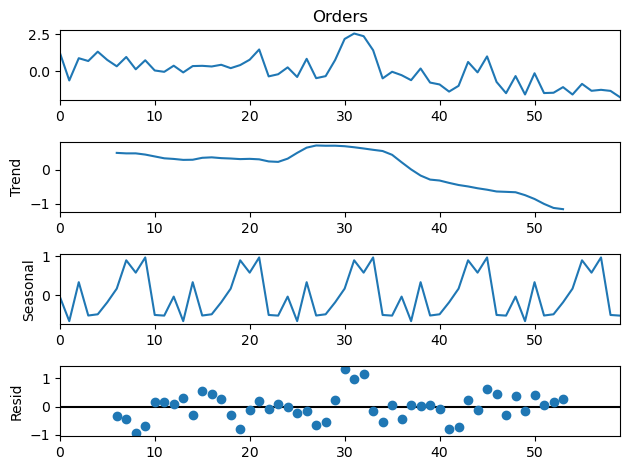

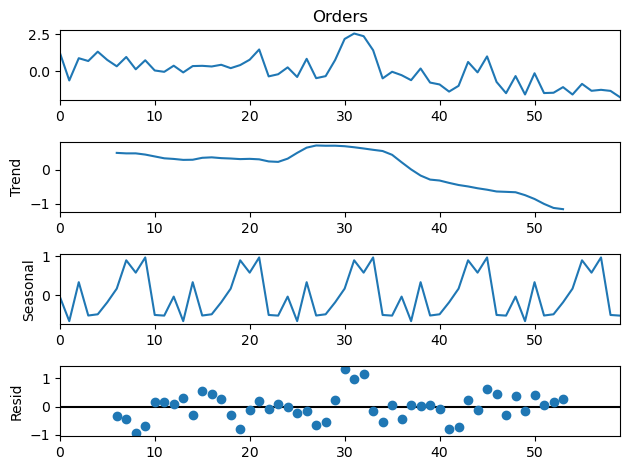

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decomposition
ts_decomposition=seasonal_decompose(AltoSales['Orders'], period=12)
# ts_decomposition
ts_decomposition.plot()

# results are showing the data is seasonal and tend to decline and not stationary

<Figure size 2000x1000 with 0 Axes>

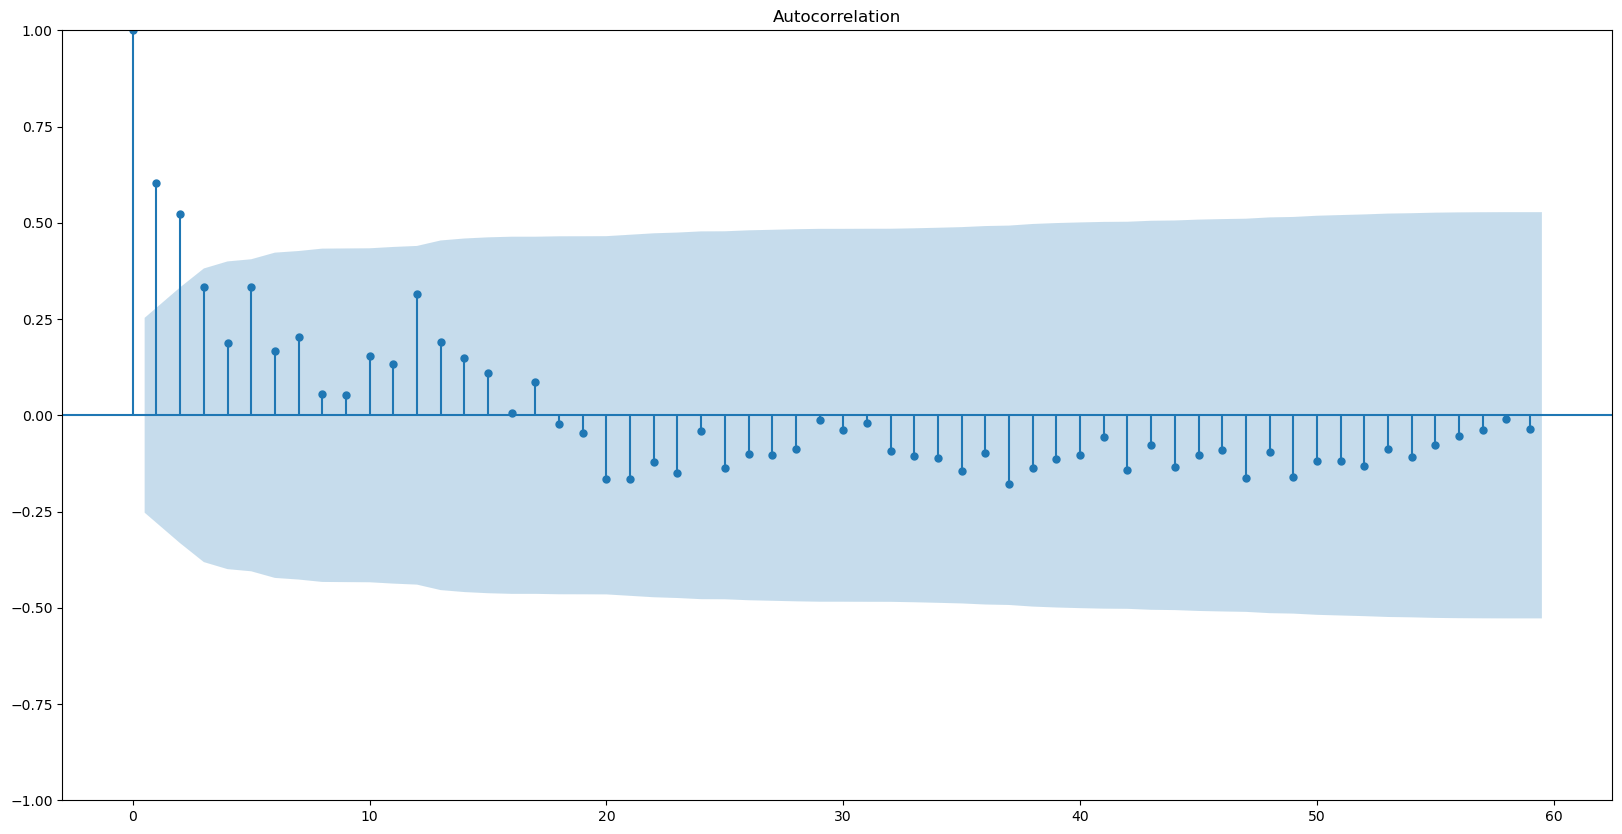

In [8]:
# ACF Chart
data_a = AltoSales.to_numpy().T[1]
plt.rc("figure", figsize=(20,10))
plt.figure(figsize=(20,10))
plot_acf(data_a, lags=59)
plt.show()

# results are showing the MA parameter 'q' should be 1

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\Ahmad\anaconda3_2.0\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 2000x1000 with 0 Axes>

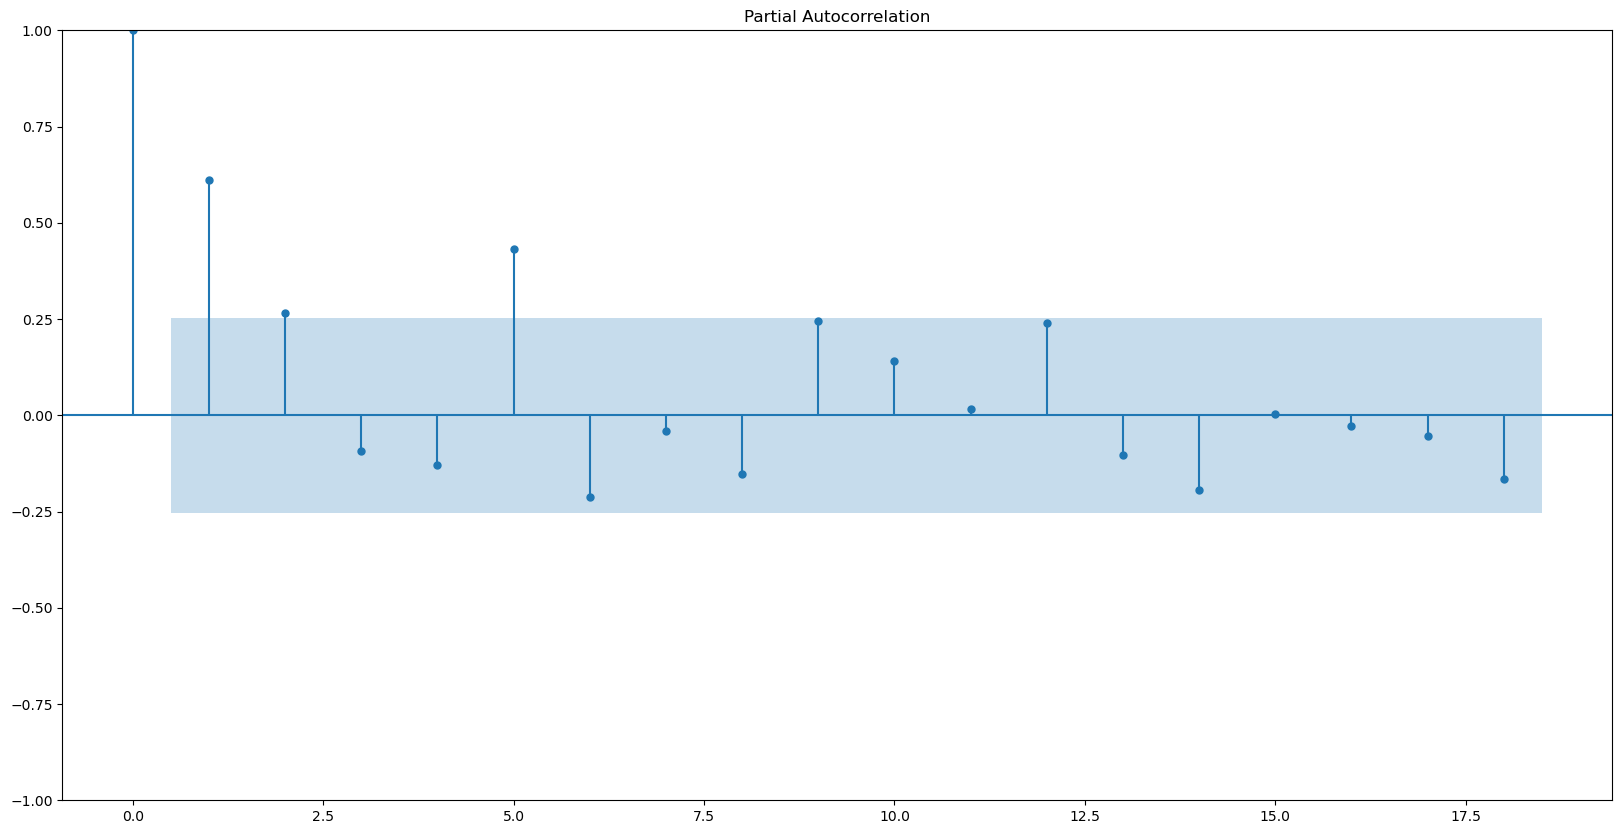

In [10]:
# PACF Chart 
plt.rc("figure", figsize=(20,10))
plt.figure(figsize=(20,10))
plot_pacf(data_a)
plt.show()

# results are showing the AR parameter 'p' should be 1

In [11]:
from statsmodels.tsa.stattools import adfuller
# Perform the ADF test
result = adfuller(data_a)

# Print the test statistics and p-value
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# the result is greater than 0.05, so it shows that the data is not stationary, so the data is seasonal 

ADF Statistic: -0.520165
p-value: 0.888021


### Outliers detecting and replacing 
4 methods used: PCA, LOF, KNN, HBOS

In [12]:
# transform the data to array form 
data_a = AltoSales.to_numpy().T[1]
data_a

array([ 1.26617135, -0.61770515,  0.88290647,  0.69360659,  1.32379074,
        0.76677337,  0.33740581,  0.9653497 ,  0.13511065,  0.74325067,
        0.05499907, -0.03608976,  0.37710315, -0.07645918,  0.35160903,
        0.36890381,  0.32494998,  0.43996475,  0.21199625,  0.41917517,
        0.78079737,  1.47173728, -0.34327373, -0.19814991,  0.26509033,
       -0.38279185,  0.84177715, -0.46411316, -0.32696466,  0.76327857,
        2.18221223,  2.54813572,  2.36869118,  1.42182437, -0.478406  ,
       -0.0321469 , -0.26222125, -0.59870777,  0.18910083, -0.7604991 ,
       -0.88761125, -1.3693112 , -0.98044748,  0.62926642, -0.07421892,
        1.00486783, -0.71721734, -1.47603702, -0.32163285, -1.56313819,
       -0.13152468, -1.46761366, -1.44673447, -1.06781748, -1.5657817 ,
       -0.84930286, -1.31536582, -1.2496367 , -1.32159374, -1.74733208])

In [13]:
## PCA

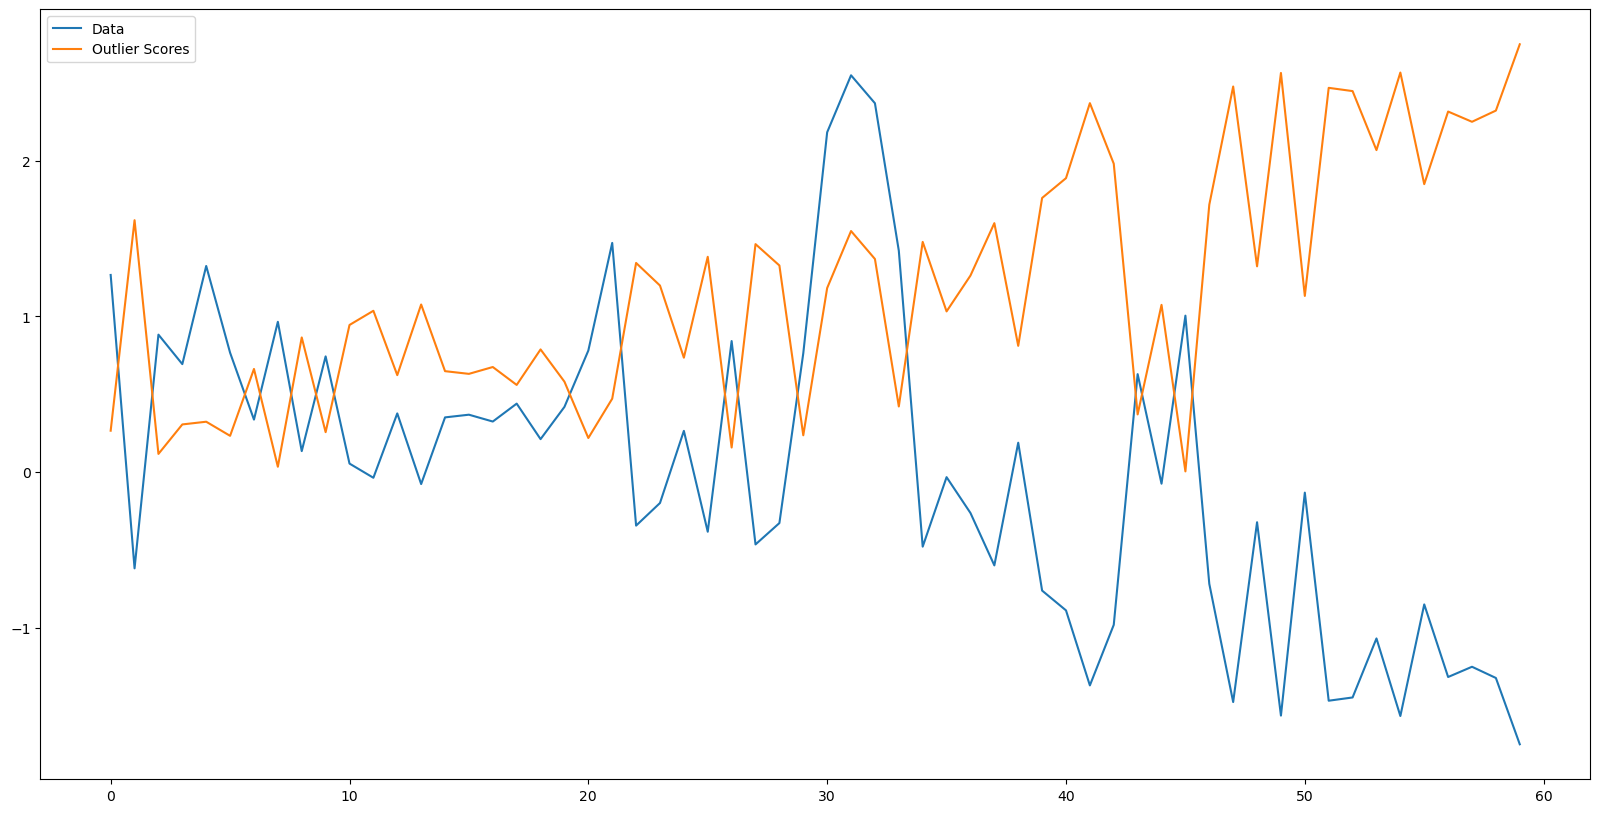

In [14]:
from pyod.models.pca import PCA

# Fit the PCA model to the data
pca_model = PCA(contamination=0.1)
pca_model.fit(data_a.reshape(-1, 1))

# Predict the outlier scores for the data
scores = pca_model.decision_function(data_a.reshape(-1, 1))

# Plot the time series data and the outlier scores
plt.plot(data_a, label='Data')
plt.plot(scores, label='Outlier Scores')
plt.legend()
plt.show()

In [15]:
# LOF

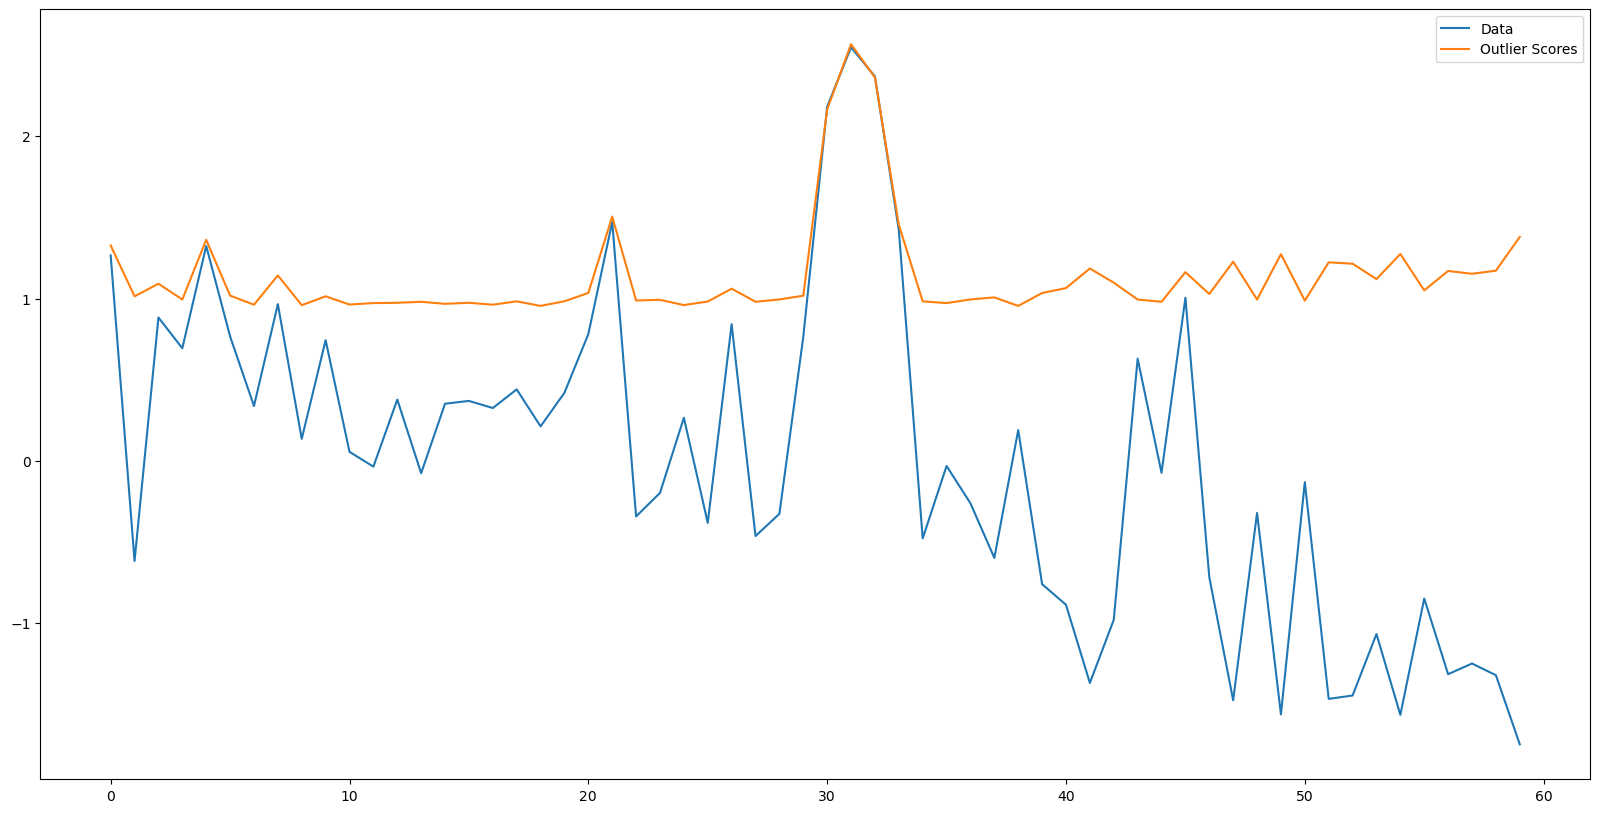

In [16]:
from pyod.models.lof import LOF

# Fit the outlier detection model to the data
lof_model = LOF(contamination=0.1)
lof_model.fit(data_a.reshape(-1, 1))

# Predict the outlier scores for the data
scores = lof_model.decision_function(data_a.reshape(-1, 1))

# Plot the time series data and the outlier scores
plt.plot(data_a, label='Data')
plt.plot(scores, label='Outlier Scores')
plt.legend()
plt.show()

In [17]:
# KNN

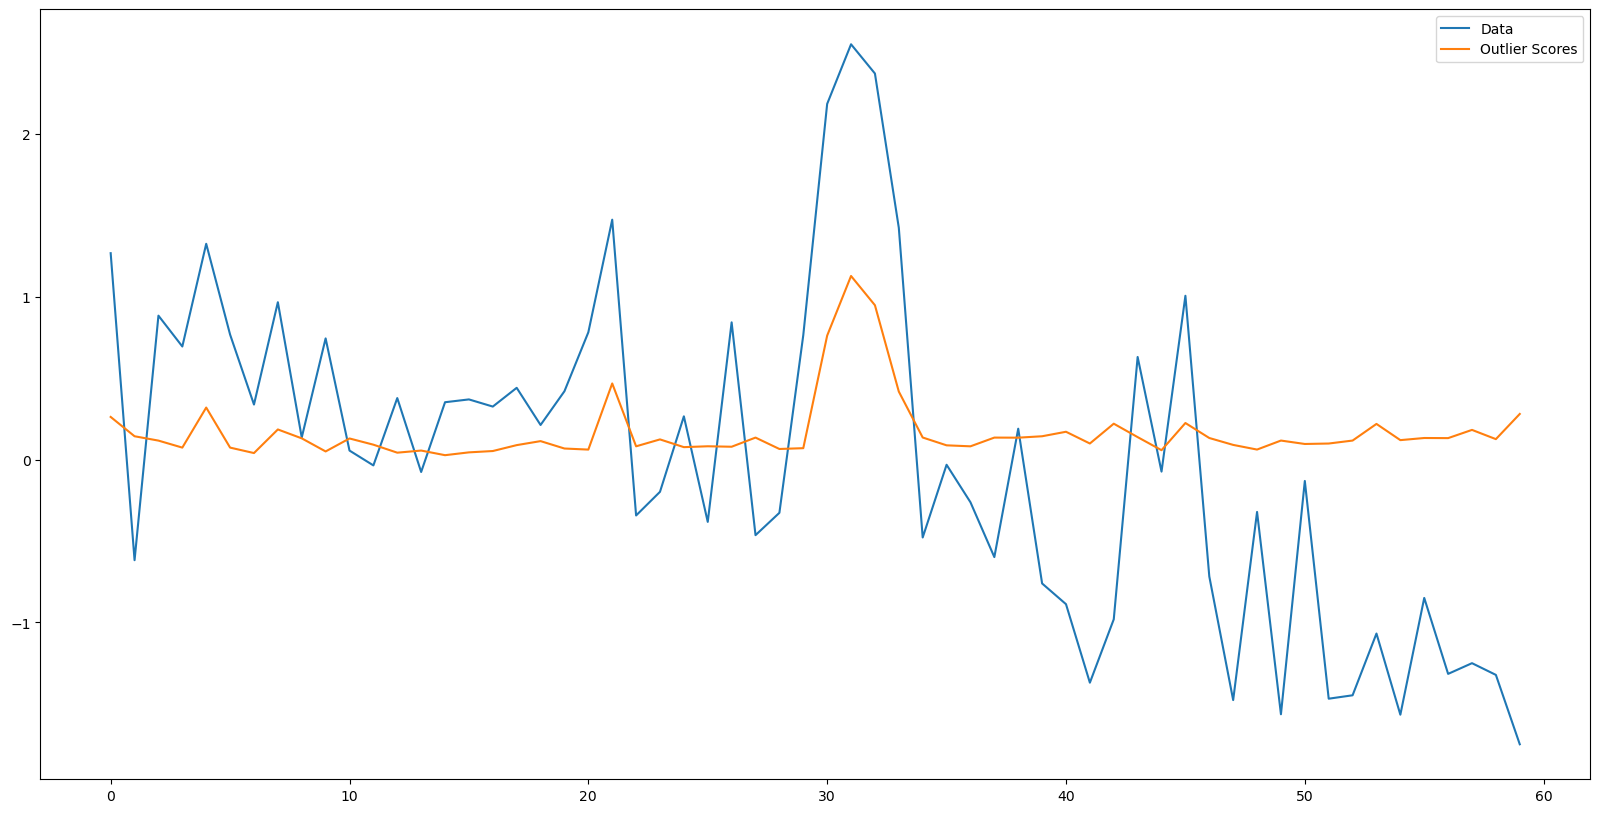

In [18]:
from pyod.models.knn import KNN

# Fit the KNN model to the data
knn_model = KNN(contamination=0.1)
knn_model.fit(data_a.reshape(-1, 1))

# Predict the outlier scores for the data
scores = knn_model.decision_function(data_a.reshape(-1, 1))

# Plot the time series data and the outlier scores
plt.plot(data_a, label='Data')
plt.plot(scores, label='Outlier Scores')
plt.legend()
plt.show()

In [19]:
# HBOS

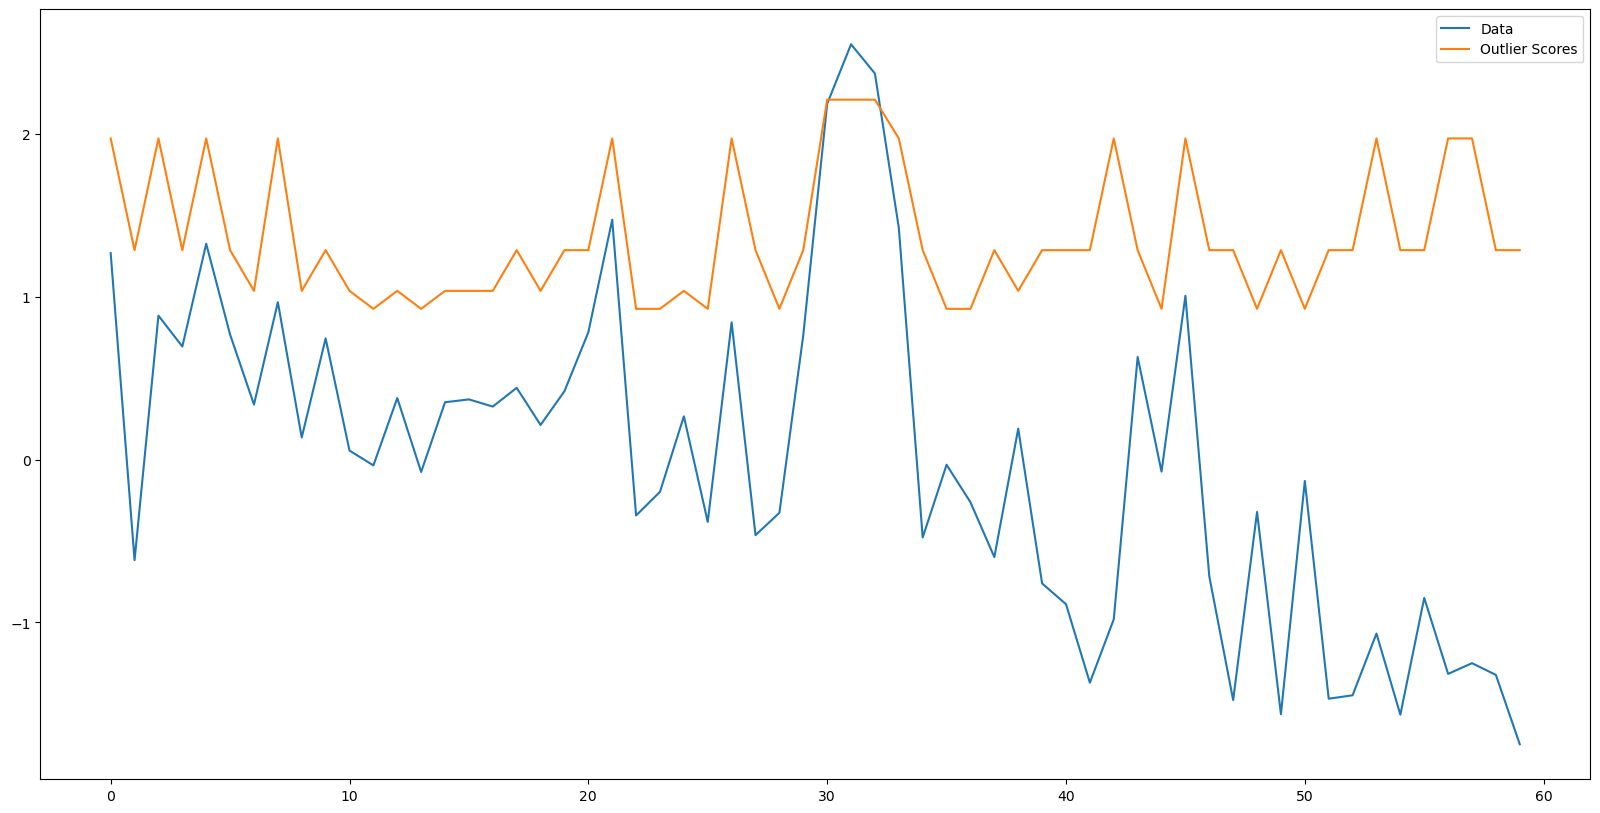

In [20]:
# import numpy as np
from pyod.models.hbos import HBOS
# import matplotlib.pyplot as plt

# Generate some sample time series data
data = np.random.randn(100)

# Fit the HBOS model to the data
hbos_model = HBOS(contamination=0.1)
hbos_model.fit(data_a.reshape(-1, 1))

# Predict the outlier scores for the data
scores = hbos_model.decision_function(data_a.reshape(-1, 1))

# Plot the time series data and the outlier scores
plt.plot(data_a, label='Data')
plt.plot(scores, label='Outlier Scores')
plt.legend()
plt.show()

# In general, higher outlier scores in HBOS indicate a higher degree of anomaly for a given data point, 
# meaning that the data point is less likely to have been generated by the underlying distribution of the data.

#### repalce the outliers with moving average method

,Month,Orders
0,1/1/2018,1.266171
1,2/1/2018,-0.617705
2,3/1/2018,0.882906
3,4/1/2018,0.693607
4,5/1/2018,1.323791


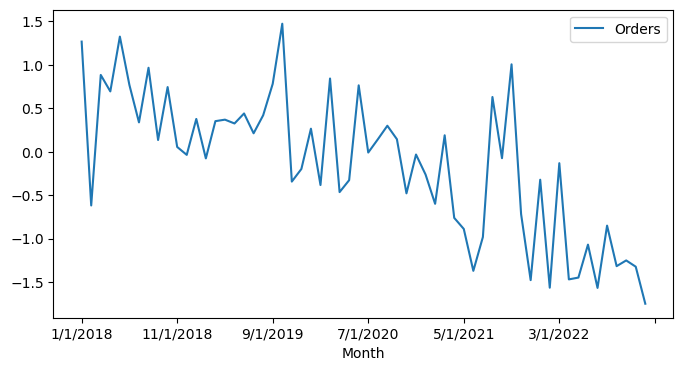

In [21]:
# replace the data 
AltoSales = pd.read_csv('Scaled_sales_Mansfield_WH_SW_Alto_2022_clean.csv').rename(columns={'Date':'Month'})
AltoSales.plot.line('Month', 'Orders', figsize = (8,4))
AltoSales.head(5)

## Making the Data Stationary

In [84]:
# # Calculate the first difference
# diff_data = np.diff(data_a)     # Using the diference of 1 as default 
# diff_data

In [85]:
# # Perform the ADF test
# result = adfuller(diff_data)

# # Print the test statistics and p-value
# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])

# # the result is lower than 0.05, so it shows that the data is stationary

In [86]:
# # ACF
# plt.rc("figure", figsize=(20,10))
# plt.figure(figsize=(20,10))
# plot_acf(diff_data, lags=58)
# plt.show()

In [87]:
# # PACF
# plt.rc("figure", figsize=(20,10))
# plt.figure(figsize=(20,10))
# plot_pacf(diff_data)
# plt.show()

In [88]:
# ## Putting the differenced data in a data frame 
# stationary_data = pd.DataFrame(diff_data).reset_index()
# stationary_data.columns = ['Date', 'Orders']
# # stationary_data['Month'] = AltoSales['Month']
# stationary_data.tail()

In [89]:
# stationary_data.plot.line('Date', 'Orders', figsize = (8,4))

#### This part will be detecting the outliers and replacing them: 
No obvious outliers after stationary transforming 

In [90]:
# # transform the data to array form 
# data_a = stationary_data.to_numpy().T[1]
# data_a

In [91]:
# from pyod.models.lof import LOF

# # Fit the outlier detection model to the data
# lof_model = LOF(contamination=0.1)
# lof_model.fit(data_a.reshape(-1, 1))

# # Predict the outlier scores for the data
# scores = lof_model.decision_function(data_a.reshape(-1, 1))

# # Plot the time series data and the outlier scores
# plt.plot(data_a, label='Data')
# plt.plot(scores, label='Outlier Scores')
# plt.legend()
# plt.show()

In [92]:
# from pyod.models.knn import KNN

# # Fit the KNN model to the data
# knn_model = KNN(contamination=0.1)
# knn_model.fit(data_a.reshape(-1, 1))

# # Predict the outlier scores for the data
# scores = knn_model.decision_function(data_a.reshape(-1, 1))

# # Plot the time series data and the outlier scores
# plt.plot(data_a, label='Data')
# plt.plot(scores, label='Outlier Scores')
# plt.legend()
# plt.show()

In [93]:
# # import numpy as np
# from pyod.models.hbos import HBOS
# # import matplotlib.pyplot as plt

# # Generate some sample time series data
# data = np.random.randn(100)

# # Fit the HBOS model to the data
# hbos_model = HBOS(contamination=0.1)
# hbos_model.fit(data_a.reshape(-1, 1))

# # Predict the outlier scores for the data
# scores = hbos_model.decision_function(data_a.reshape(-1, 1))

# # Plot the time series data and the outlier scores
# plt.plot(data_a, label='Data')
# plt.plot(scores, label='Outlier Scores')
# plt.legend()
# plt.show()

# # In general, higher outlier scores in HBOS indicate a higher degree of anomaly for a given data point, 
# # meaning that the data point is less likely to have been generated by the underlying distribution of the data.

In [32]:
# stationary_data.to_csv('stationary_sales_data.csv', index=False)

## Import Macro Varibales 

In [33]:
# outliers are removed from the macro variables and replaced using moving average
macro_var = pd.read_csv('macro_variables_clean.csv').rename(columns={'Date':'Month'})
#macro_var.head()

# another data removed the Jan 2018 data 
macro_var_59 = pd.read_csv('macro_variables_59.csv').rename(columns={'Date':'Month'})

In [34]:
macro_var_59.tail()

,Month,CPI,FED FUNDS RATE,RETAIL SALES,U RATE,R GDP,H Total Sales,TCS,PPI
54,8/1/2022,-0.04,2.33,0.6,3.7,0.8,15.91,1.06269,-1.10520
55,9/1/2022,0.22,2.56,-2.1,3.5,0.8,-13.73,0.81667,0.54100
56,10/1/2022,0.41,3.08,2.0,3.7,0.7,2.27,0.50525,0.04681
57,11/1/2022,-0.10,3.78,-1.1,3.6,0.7,-4.44,0.81919,1.76687
58,12/1/2022,-0.31,4.10,-1.6,3.5,0.7,9.30,0.74659,-0.69331


In [35]:
stationary_data.head()

,Date,Orders
0,0,-1.883876
1,1,1.500612
2,2,-0.189300
3,3,0.630184
4,4,-0.557017


### Stationary Data Combined with the macro variables 

In [94]:
# # combine the data with sales data
# # combined_data = stationary_data.join(macro_var_59, how='inner', on='Month')
# combined_data = pd.concat([stationary_data, macro_var_59], axis=1)
# # combined_data.index = pd.to_datetime(combined_data['Month'])
# # combined_data.drop("Month", axis = 1, inplace = True)
# #new_data.drop("Month", axis = 1, inplace = True)
# combined_data.head()

In [95]:
# combined_data.tail() 

In [96]:
# fig = px.line(combined_data, x=combined_data.Month, y=combined_data.columns[1:11])
# fig.update_layout(title_text="Line Charts of All Variables", title_x = 0.5)
# # fig.add_vline(x=59, line_width=3, line_dash="dash", line_color="grey")
# # Show plot 
# fig.show()

# the chart shows that <'RETAIL SALES', 'U RATE', 'R GDP'> have potential outliers to replace 

In [97]:
# import matplotlib.pyplot as mp
# import seaborn as sb
# # new_data.iloc[:,0:9].corr().where(np.triu(np.ones(new_data.corr().shape), k=1).astype(bool))
# # creating mask
# mask = np.triu(np.ones_like(combined_data.iloc[:,1:11].corr()))
 
# # plotting a triangle correlation heatmap
# dataplot = sb.heatmap(combined_data.iloc[:,1:11].corr(), cmap="YlGnBu", annot=True, mask=mask)
 
# # displaying heatmap
# # mp.show()

In [40]:
combined_data.to_csv('stationary_data.csv', index=False)

### Standardize Data

In [41]:
# combined_data_60 = pd.concat([AltoSales, macro_var], axis=1)
combined_data_60 = AltoSales.merge(macro_var, how='inner', on='Month')
combined_data_60

,Month,Orders,CPI,FED FUNDS RATE,RETAIL SALES,U RATE,R GDP,H Total Sales,TCS,PPI
0,1/1/2018,1.266171,0.54,1.41,-0.9,4.0,0.7,6.67,0.91296,1.65226
1,2/1/2018,-0.617705,0.45,1.42,-0.1,4.1,0.7,12.50,0.18094,1.53298
2,3/1/2018,0.882906,0.23,1.51,0.1,4.0,0.7,22.22,1.68573,-0.76576
3,4/1/2018,0.693607,0.40,1.69,1.4,4.0,0.7,-7.58,0.05921,0.86913
4,5/1/2018,1.323791,0.42,1.70,-0.8,3.8,0.7,1.64,0.47337,0.58506
5,6/1/2018,0.766773,0.16,1.82,0.3,4.0,0.7,-9.68,-0.29446,-1.36472
6,7/1/2018,0.337406,0.01,1.91,0.5,3.8,0.7,-7.14,0.05907,-0.58592
7,8/1/2018,0.965350,0.06,1.91,-1.2,3.8,0.7,-9.62,0.17710,0.08660
8,9/1/2018,0.135111,0.12,1.95,-0.1,3.7,0.7,-2.13,0.23571,-1.04148
9,10/1/2018,0.743251,0.18,2.19,0.5,3.8,0.2,-6.52,-0.29394,-1.28826


In [42]:
from sklearn.preprocessing import StandardScaler

# Separate the Date column from the dataframe
numeric_cols = combined_data_60.drop(['Orders', 'Month'], axis=1)

In [43]:
# Standardize the numeric dataframe
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numeric_cols)
# Convert the standardized numpy array back to a dataframe

standardized_data = pd.DataFrame(standardized_data, columns=numeric_cols.columns)
standardized_data['Orders'] = combined_data_60['Orders']
standardized_data['Month'] = combined_data_60['Month']
standardized_data = standardized_data[['Month', 'Orders', 'CPI', 'FED FUNDS RATE', 'RETAIL SALES', 'U RATE', 'R GDP',
       'H Total Sales', 'TCS', 'PPI']]
standardized_data.tail()

,Month,Orders,CPI,FED FUNDS RATE,RETAIL SALES,U RATE,R GDP,H Total Sales,TCS,PPI
55,8/1/2022,-0.849303,-0.889938,1.012799,0.377147,-0.561228,0.413329,1.226823,0.924596,-1.630282
56,9/1/2022,-1.315366,-0.230725,1.223767,-1.869095,-0.704826,0.413329,-1.180820,0.511058,-0.015889
57,10/1/2022,-1.249637,0.251008,1.700738,1.541865,-0.561228,0.286800,0.118852,-0.012411,-0.500530
58,11/1/2022,-1.321594,-1.042064,2.342814,-1.037154,-0.633027,0.286800,-0.426198,0.515294,1.186295
59,12/1/2022,-1.747332,-1.574505,2.636335,-1.453125,-0.704826,0.286800,0.689896,0.393260,-1.226350


In [44]:
fig = px.line(standardized_data, x=standardized_data.Month, y=standardized_data.columns[0:11],
              labels={"index": "Month"})
fig.update_layout(title_text="Line Charts of All Variables", title_x = 0.5)
# fig.add_vline(x=59, line_width=3, line_dash="dash", line_color="grey")
# Show plot 
fig.show()

C:\Users\Ahmad\AppData\Local\Temp\ipykernel_27484\3574079212.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Ahmad\AppData\Local\Temp\ipykernel_27484\3574079212.py:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



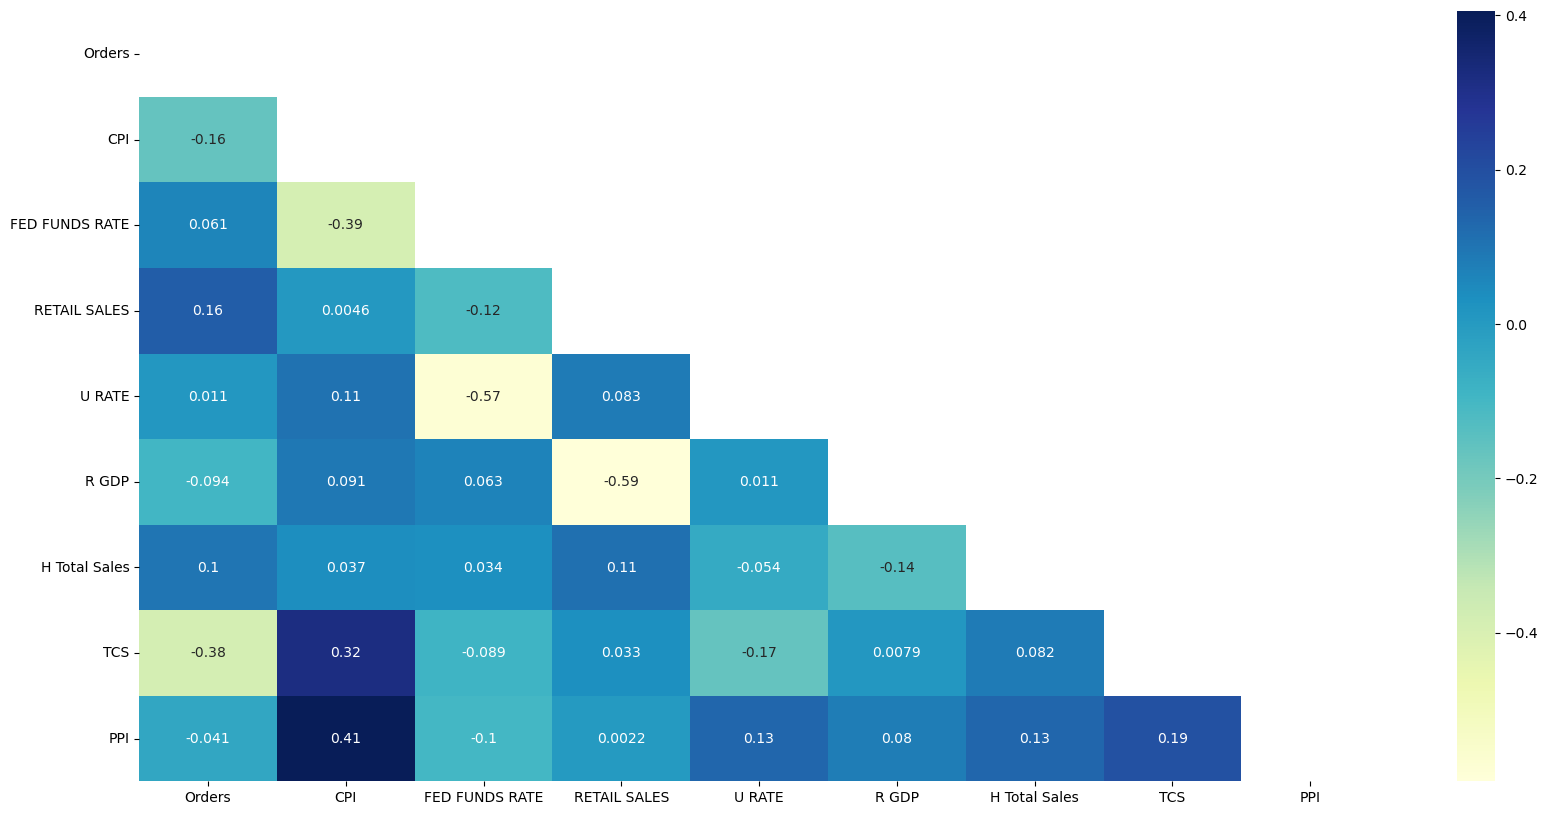

In [45]:
import matplotlib.pyplot as mp
import seaborn as sb
# new_data.iloc[:,0:9].corr().where(np.triu(np.ones(new_data.corr().shape), k=1).astype(bool))
# creating mask
mask = np.triu(np.ones_like(standardized_data.iloc[:,0:11].corr()))
 
# plotting a triangle correlation heatmap
dataplot = sb.heatmap(standardized_data.iloc[:,0:11].corr(), cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
# mp.show()

In [46]:
standardized_data.to_csv('standardized_data.csv', index=False)

#### Detect and replace the outliers form the macro-variables

In [47]:
# transform the data to array form 
RETAIL_SALES_a = macro_var.to_numpy().T[3]
RETAIL_SALES_a

array([-0.9, -0.1, 0.1, 1.4, -0.8, 0.3, 0.5, -1.2, -0.1, 0.5, 0.0, 0.2,
       -1.1, 0.1, 0.7, 0.7, 0.5, 0.6, 0.2, 0.0, 1.2, -1.1, 0.7, -1.7, 3.7,
       0.9, 1.0, 1.9, 1.2, 1.4, 2.7, 1.8, 1.0, -0.8, -1.7, -0.2, -0.9,
       -0.9, -0.7, 0.0, -0.5, -0.6, -0.4, 0.0, 0.8, 0.5, -0.1, -2.7, 1.1,
       2.5, 0.0, 1.5, -1.1, -1.2, 0.1, 0.6, -2.1, 2.0, -1.1, -1.6],
      dtype=object)

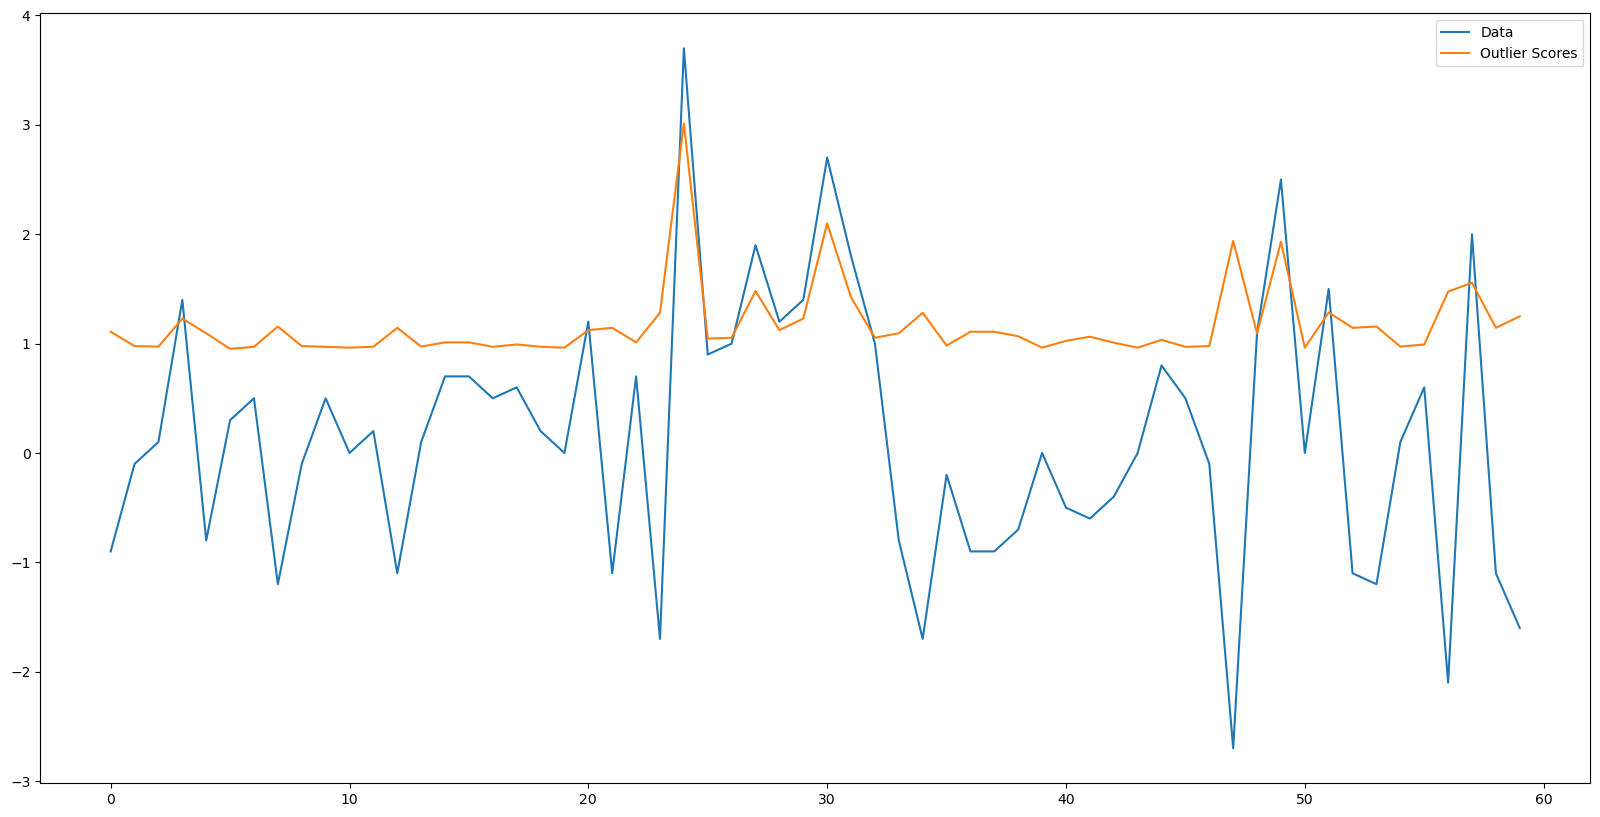

In [48]:
from pyod.models.lof import LOF

# Fit the outlier detection model to the data
lof_model = LOF(contamination=0.1)
lof_model.fit(RETAIL_SALES_a.reshape(-1, 1))

# Predict the outlier scores for the data
scores = lof_model.decision_function(RETAIL_SALES_a.reshape(-1, 1))

# Plot the time series data and the outlier scores
plt.plot(RETAIL_SALES_a, label='Data')
plt.plot(scores, label='Outlier Scores')
plt.legend()
plt.show()

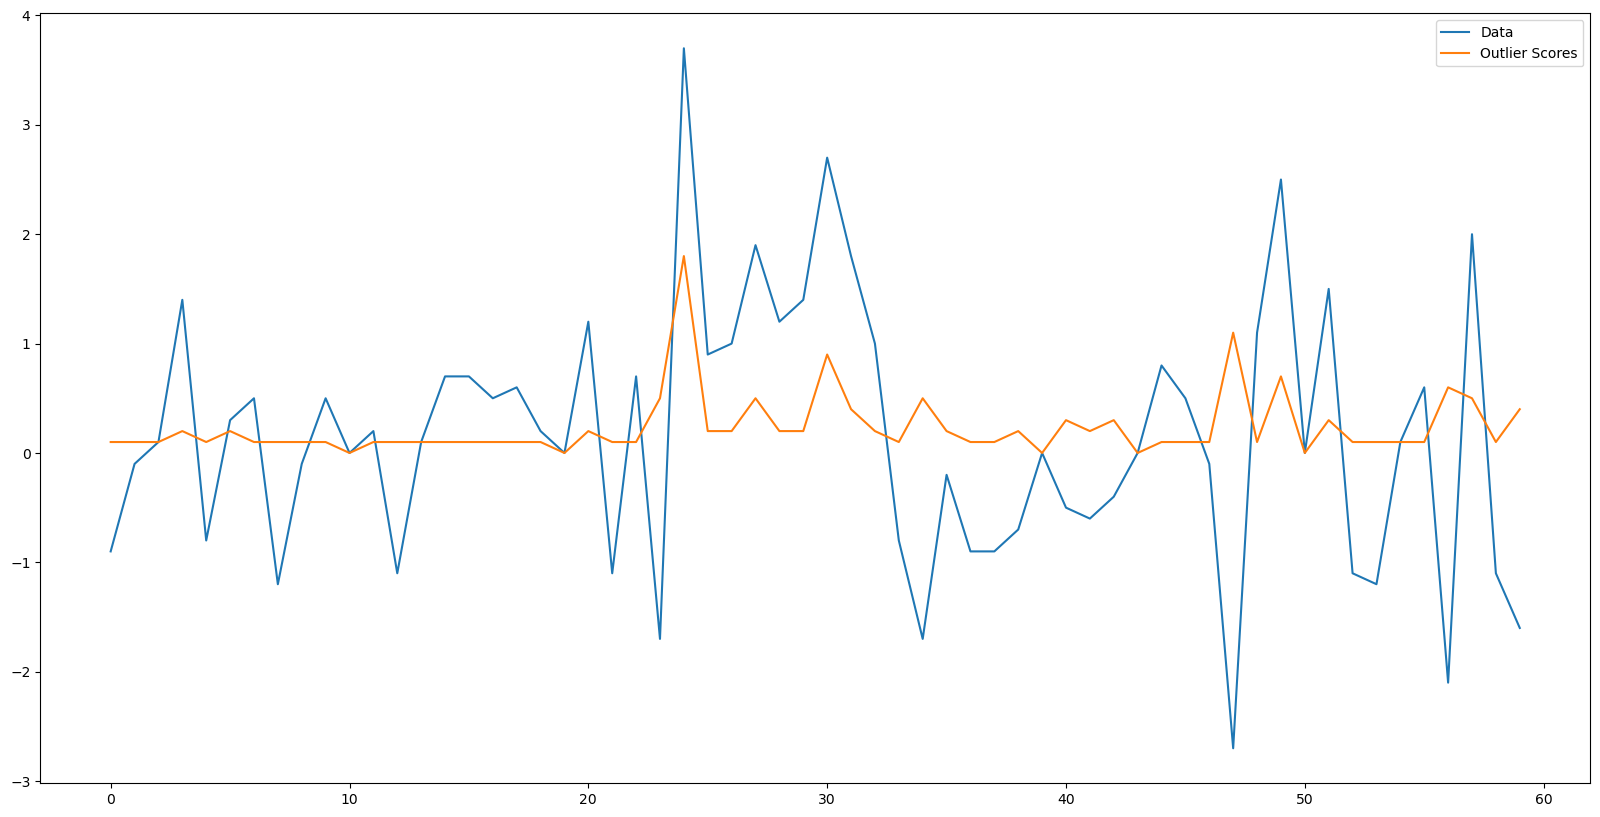

In [49]:
from pyod.models.knn import KNN

# Fit the KNN model to the data
knn_model = KNN(contamination=0.1)
knn_model.fit(RETAIL_SALES_a.reshape(-1, 1))

# Predict the outlier scores for the data
scores = knn_model.decision_function(RETAIL_SALES_a.reshape(-1, 1))

# Plot the time series data and the outlier scores
plt.plot(RETAIL_SALES_a, label='Data')
plt.plot(scores, label='Outlier Scores')
plt.legend()
plt.show()

In [50]:
# transform the data to array form 
U_RATE_a = macro_var.to_numpy().T[4]
U_RATE_a

array([4.0, 4.1, 4.0, 4.0, 3.8, 4.0, 3.8, 3.8, 3.7, 3.8, 3.8, 3.9, 4.0,
       3.8, 3.8, 3.6, 3.7, 3.6, 3.7, 3.7, 3.5, 3.6, 3.6, 3.6, 3.5, 3.5,
       4.4, 3.9, 3.9, 3.9, 10.2, 8.4, 7.9, 6.9, 6.7, 6.7, 6.3, 6.2, 6.1,
       6.1, 5.8, 5.9, 5.4, 5.2, 4.8, 4.5, 4.2, 3.9, 4.0, 3.8, 3.6, 3.6,
       3.6, 3.6, 3.5, 3.7, 3.5, 3.7, 3.6, 3.5], dtype=object)

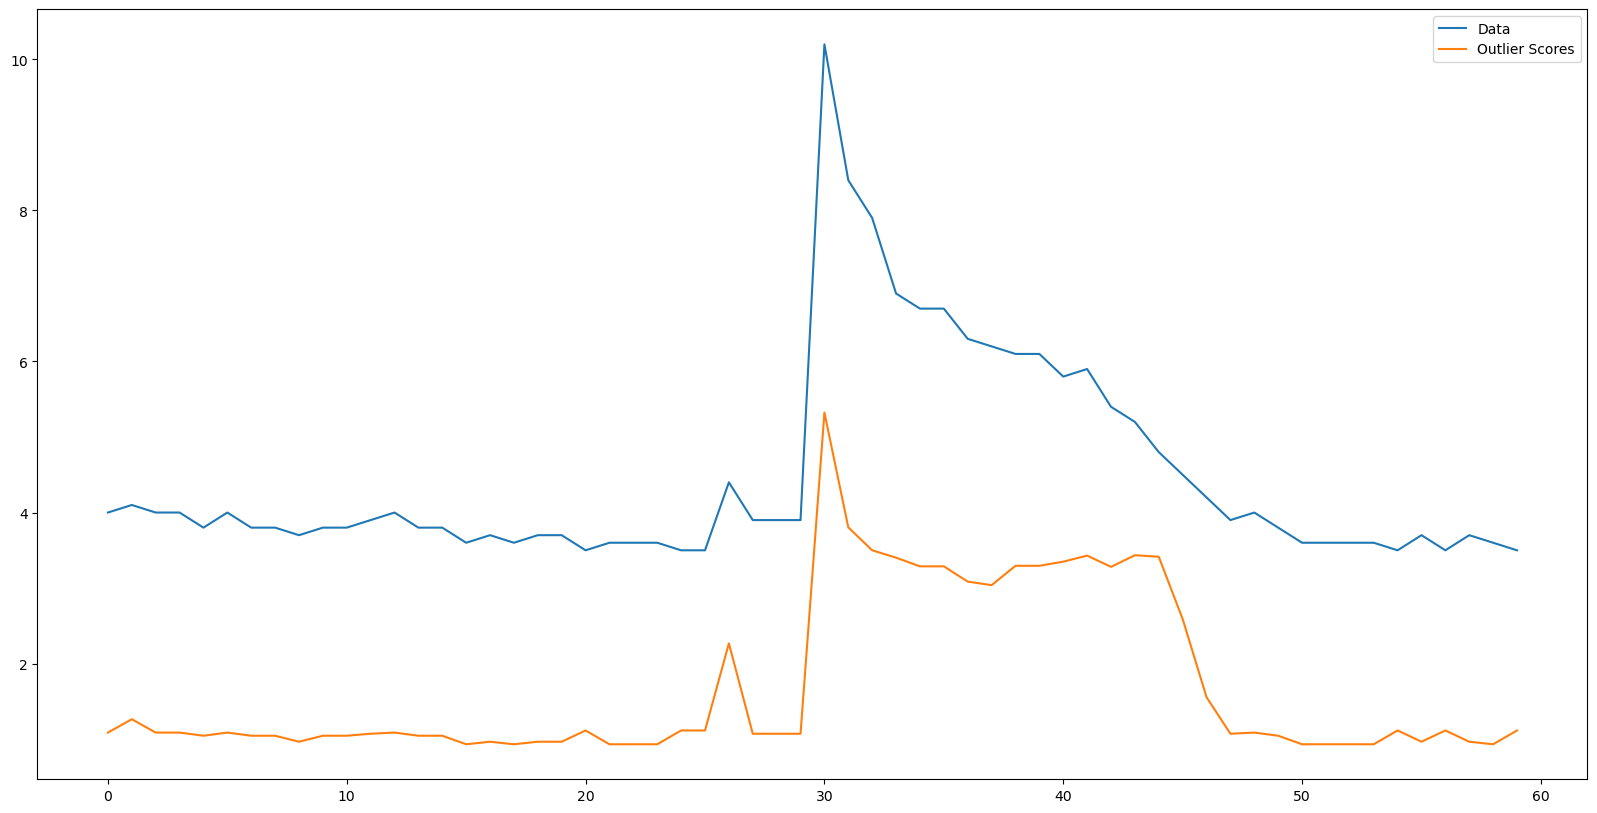

In [51]:
from pyod.models.lof import LOF

# Fit the outlier detection model to the data
lof_model = LOF(contamination=0.1)
lof_model.fit(U_RATE_a.reshape(-1, 1))

# Predict the outlier scores for the data
scores = lof_model.decision_function(U_RATE_a.reshape(-1, 1))

# Plot the time series data and the outlier scores
plt.plot(U_RATE_a, label='Data')
plt.plot(scores, label='Outlier Scores')
plt.legend()
plt.show()

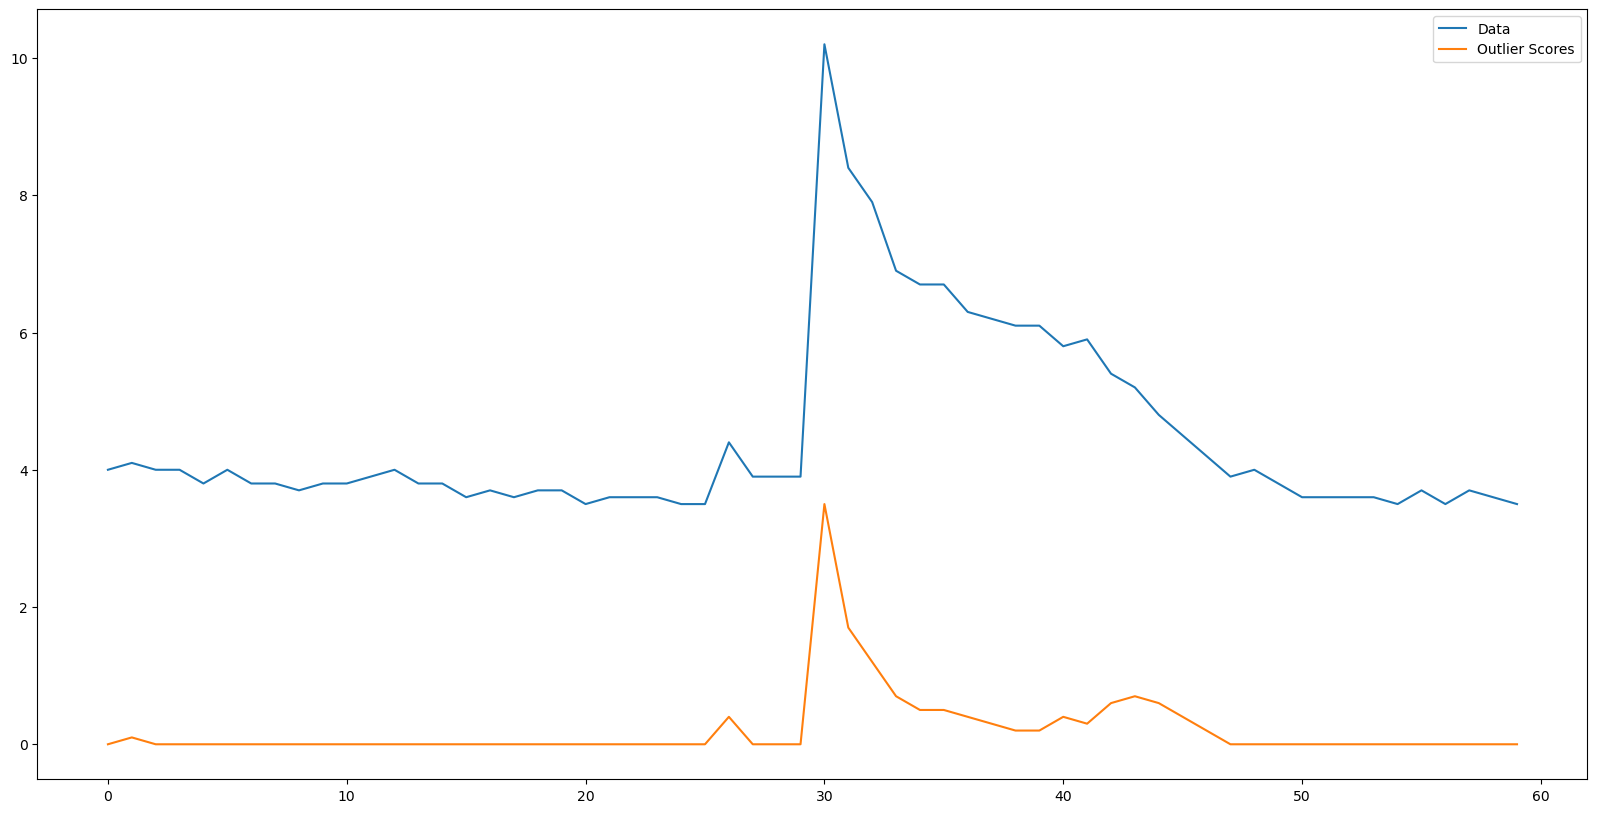

In [52]:
from pyod.models.knn import KNN

# Fit the KNN model to the data
knn_model = KNN(contamination=0.1)
knn_model.fit(U_RATE_a.reshape(-1, 1))

# Predict the outlier scores for the data
scores = knn_model.decision_function(U_RATE_a.reshape(-1, 1))

# Plot the time series data and the outlier scores
plt.plot(U_RATE_a, label='Data')
plt.plot(scores, label='Outlier Scores')
plt.legend()
plt.show()

In [53]:
# transform the data to array form 
R_GDP_a = macro_var.to_numpy().T[5]
R_GDP_a

array([0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.2, 0.2, 0.2, 0.5,
       0.5, 0.5, 0.7, 0.7, 0.7, 0.9, 0.9, 0.9, 0.4, 0.4, 0.4, -1.2, -1.2,
       -0.7, -1.0, -1.0, -0.9, -1.0, -0.9, -0.9, 1.0, 1.0, 1.0, 1.5, 1.5,
       1.5, 1.7, 1.7, 1.7, 0.7, 0.7, 0.7, 1.7, 1.7, 1.7, -0.4, -0.4, -0.4,
       -0.1, -0.1, -0.1, 0.8, 0.8, 0.8, 0.7, 0.7, 0.7], dtype=object)

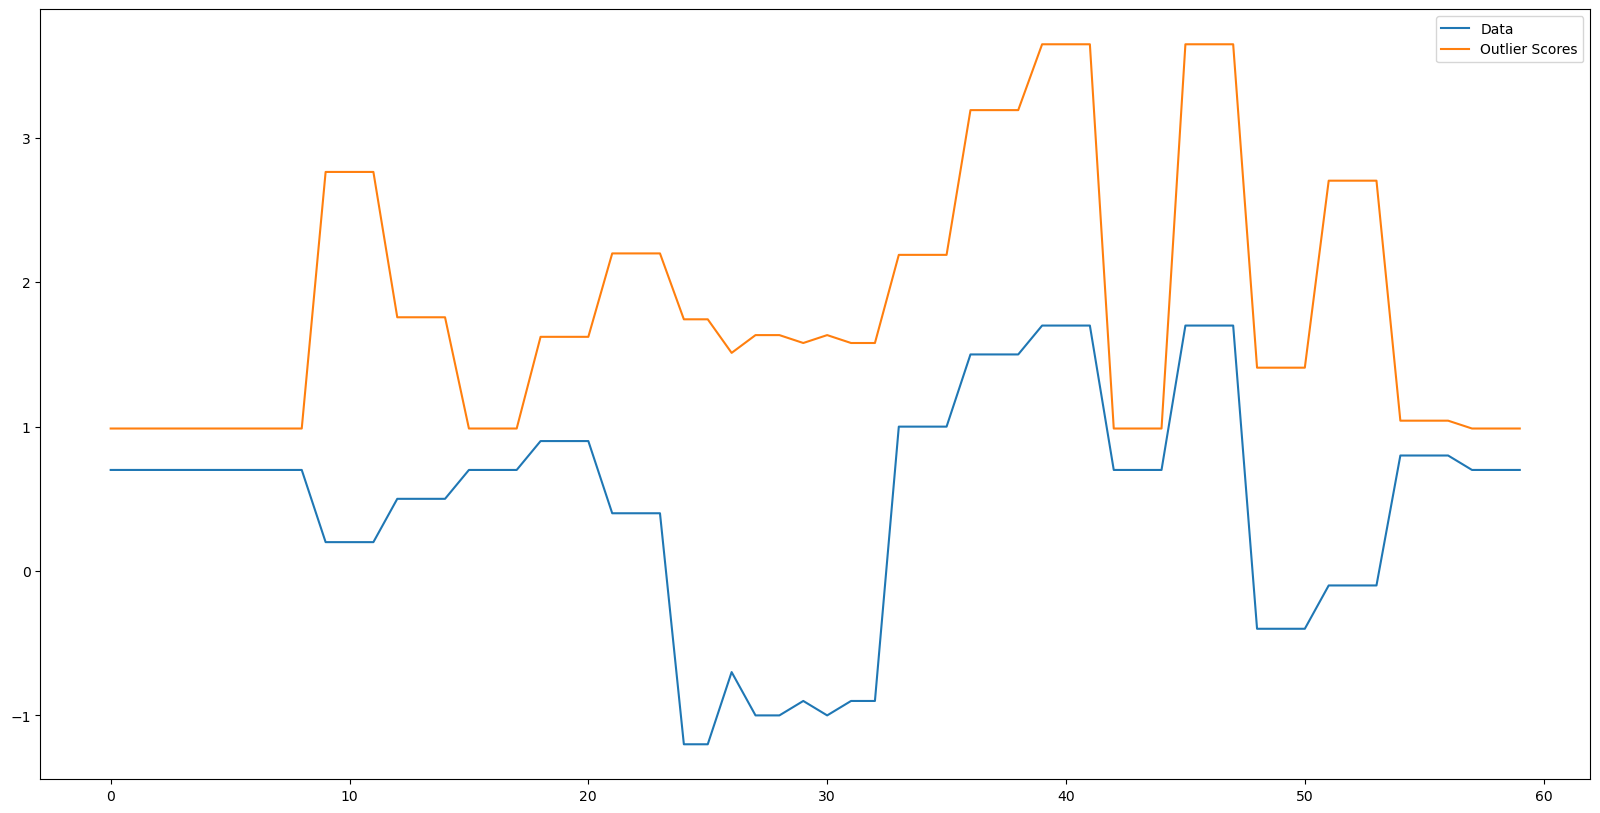

In [54]:
from pyod.models.lof import LOF

# Fit the outlier detection model to the data
lof_model = LOF(contamination=0.1)
lof_model.fit(R_GDP_a.reshape(-1, 1))

# Predict the outlier scores for the data
scores = lof_model.decision_function(R_GDP_a.reshape(-1, 1))

# Plot the time series data and the outlier scores
plt.plot(R_GDP_a, label='Data')
plt.plot(scores, label='Outlier Scores')
plt.legend()
plt.show()

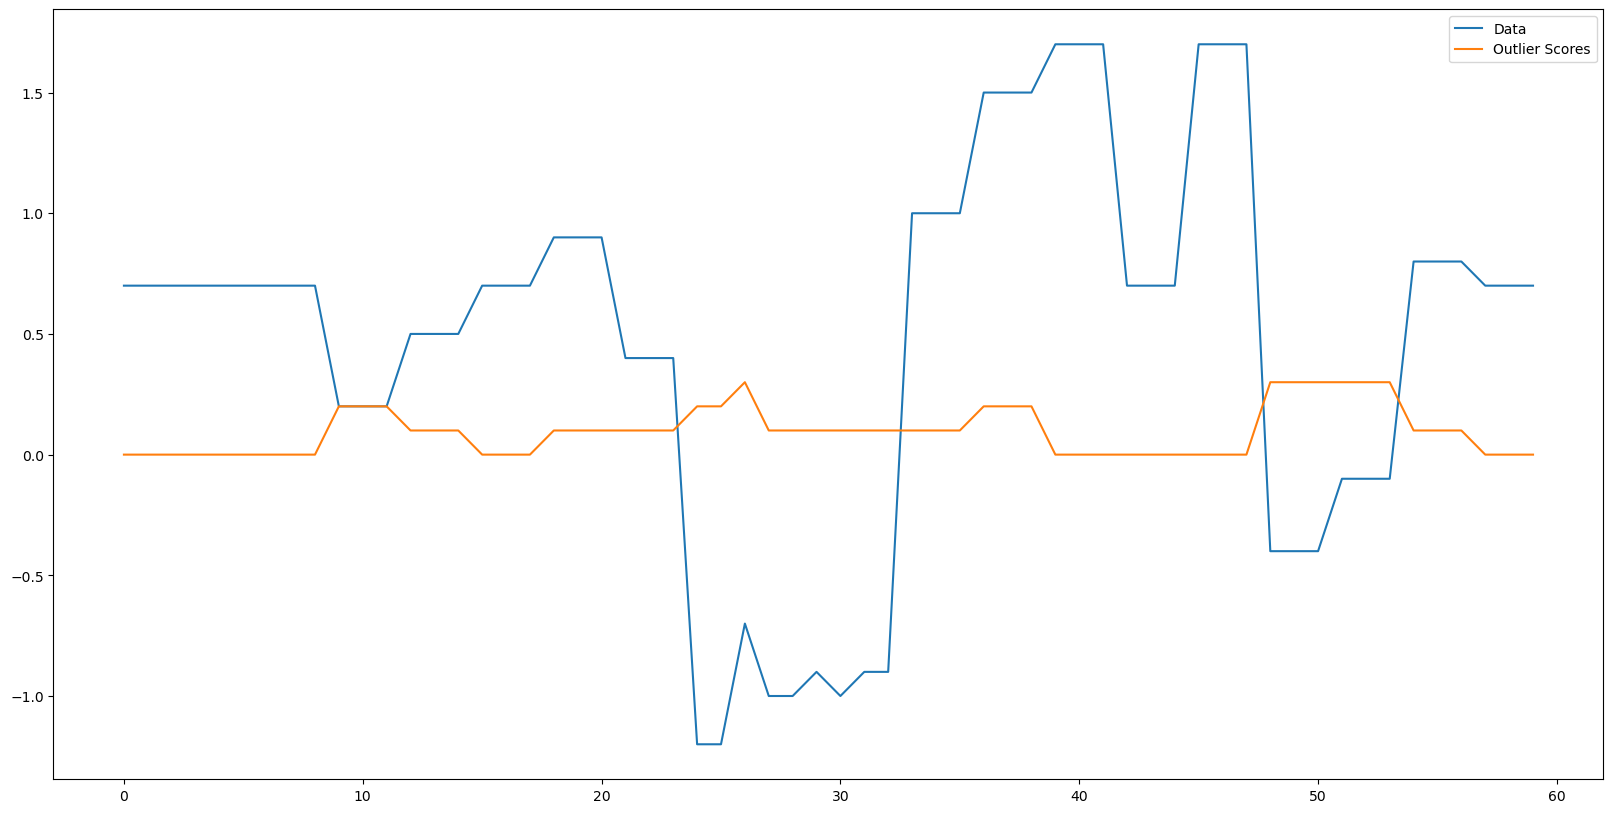

In [55]:
from pyod.models.knn import KNN

# Fit the KNN model to the data
knn_model = KNN(contamination=0.1)
knn_model.fit(R_GDP_a.reshape(-1, 1))

# Predict the outlier scores for the data
scores = knn_model.decision_function(R_GDP_a.reshape(-1, 1))

# Plot the time series data and the outlier scores
plt.plot(R_GDP_a, label='Data')
plt.plot(scores, label='Outlier Scores')
plt.legend()
plt.show()

#### Replacing outliers using new csv file

In [56]:
macro_var = pd.read_csv('macro_variables_clean.csv').rename(columns={'Date':'Month'})
macro_var.head()

,Month,CPI,FED FUNDS RATE,RETAIL SALES,U RATE,R GDP,H Total Sales,TCS,PPI
0,1/1/2018,0.54,1.41,-0.9,4.0,0.7,6.67,0.91296,1.65226
1,2/1/2018,0.45,1.42,-0.1,4.1,0.7,12.50,0.18094,1.53298
2,3/1/2018,0.23,1.51,0.1,4.0,0.7,22.22,1.68573,-0.76576
3,4/1/2018,0.40,1.69,1.4,4.0,0.7,-7.58,0.05921,0.86913
4,5/1/2018,0.42,1.70,-0.8,3.8,0.7,1.64,0.47337,0.58506


## Lag Variables

In [57]:
# get the lag_variables
def lag_variable(variable,n_lags):
    data=pd.DataFrame()
    variables_name=variable.columns.values
    for i in range(1,(n_lags+1)):
        for j in variables_name:
            name=str(j)+'lag_'+ str(i)
            variable[name]=variable[j].shift(i)
    #data = variable.dropna()  
    data = variable
    return data

In [58]:
macro_var_lag = lag_variable(macro_var,5)
macro_var_lag.head(10)

,Month,CPI,FED FUNDS RATE,RETAIL SALES,U RATE,R GDP,H Total Sales,TCS,PPI,Monthlag_1,...,PPIlag_4,Monthlag_5,CPIlag_5,FED FUNDS RATElag_5,RETAIL SALESlag_5,U RATElag_5,R GDPlag_5,H Total Saleslag_5,TCSlag_5,PPIlag_5
0,1/1/2018,0.54,1.41,-0.9,4.0,0.7,6.67,0.91296,1.65226,None,...,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/1/2018,0.45,1.42,-0.1,4.1,0.7,12.50,0.18094,1.53298,1/1/2018,...,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/1/2018,0.23,1.51,0.1,4.0,0.7,22.22,1.68573,-0.76576,2/1/2018,...,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4/1/2018,0.40,1.69,1.4,4.0,0.7,-7.58,0.05921,0.86913,3/1/2018,...,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5/1/2018,0.42,1.70,-0.8,3.8,0.7,1.64,0.47337,0.58506,4/1/2018,...,1.65226,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6/1/2018,0.16,1.82,0.3,4.0,0.7,-9.68,-0.29446,-1.36472,5/1/2018,...,1.53298,1/1/2018,0.54,1.41,-0.9,4.0,0.7,6.67,0.91296,1.65226
6,7/1/2018,0.01,1.91,0.5,3.8,0.7,-7.14,0.05907,-0.58592,6/1/2018,...,-0.76576,2/1/2018,0.45,1.42,-0.1,4.1,0.7,12.50,0.18094,1.53298
7,8/1/2018,0.06,1.91,-1.2,3.8,0.7,-9.62,0.17710,0.08660,7/1/2018,...,0.86913,3/1/2018,0.23,1.51,0.1,4.0,0.7,22.22,1.68573,-0.76576
8,9/1/2018,0.12,1.95,-0.1,3.7,0.7,-2.13,0.23571,-1.04148,8/1/2018,...,0.58506,4/1/2018,0.40,1.69,1.4,4.0,0.7,-7.58,0.05921,0.86913
9,10/1/2018,0.18,2.19,0.5,3.8,0.2,-6.52,-0.29394,-1.28826,9/1/2018,...,-1.36472,5/1/2018,0.42,1.70,-0.8,3.8,0.7,1.64,0.47337,0.58506


In [59]:
def lag_correlation(variable):
    combined_vars = AltoSales.merge(macro_var, left_index=True, right_index=True, how='left', indicator=True)
    corr = combined_vars.corr()['Orders'].sort_values(ascending=False)
    print(corr) 

In [60]:
lag_correlation(macro_var_lag)

Orders                 1.000000
FED FUNDS RATElag_5    0.501481
FED FUNDS RATElag_4    0.424014
FED FUNDS RATElag_3    0.348653
FED FUNDS RATElag_2    0.255249
RETAIL SALESlag_1      0.184110
H Total Saleslag_2     0.165992
FED FUNDS RATElag_1    0.162944
RETAIL SALES           0.155991
RETAIL SALESlag_2      0.137580
RETAIL SALESlag_4      0.125423
H Total Saleslag_1     0.118522
H Total Sales          0.099781
H Total Saleslag_3     0.092759
RETAIL SALESlag_5      0.092734
H Total Saleslag_5     0.085160
FED FUNDS RATE         0.060965
H Total Saleslag_4     0.038854
U RATE                 0.010637
U RATElag_1           -0.004634
U RATElag_2           -0.017402
R GDPlag_3            -0.017976
RETAIL SALESlag_3     -0.024735
R GDPlag_4            -0.032765
PPI                   -0.041165
R GDPlag_5            -0.049883
PPIlag_4              -0.054445
PPIlag_2              -0.054826
U RATElag_3           -0.056884
PPIlag_3              -0.068910
R GDP                 -0.094126
PPIlag_5

C:\Users\Ahmad\AppData\Local\Temp\ipykernel_27484\2601950841.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



#####  FED FUNDS RATElag_3 , RETAIL SALESlag_1, H Total Saleslag_2 , 

### Re-build the lines chart with 'Orders' 

In [61]:
# combined_data_60 = pd.concat([AltoSales, macro_var], axis=1)
combined_data_60 = AltoSales.merge(macro_var, how='inner', on='Month')
#combined_data_60 = combined_data_60.dropna()
combined_data_60.head()

,Month,Orders,CPI,FED FUNDS RATE,RETAIL SALES,U RATE,R GDP,H Total Sales,TCS,PPI,...,PPIlag_4,Monthlag_5,CPIlag_5,FED FUNDS RATElag_5,RETAIL SALESlag_5,U RATElag_5,R GDPlag_5,H Total Saleslag_5,TCSlag_5,PPIlag_5
0,1/1/2018,1.266171,0.54,1.41,-0.9,4.0,0.7,6.67,0.91296,1.65226,...,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/1/2018,-0.617705,0.45,1.42,-0.1,4.1,0.7,12.50,0.18094,1.53298,...,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/1/2018,0.882906,0.23,1.51,0.1,4.0,0.7,22.22,1.68573,-0.76576,...,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4/1/2018,0.693607,0.40,1.69,1.4,4.0,0.7,-7.58,0.05921,0.86913,...,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5/1/2018,1.323791,0.42,1.70,-0.8,3.8,0.7,1.64,0.47337,0.58506,...,1.65226,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Re-calculate the correlation metrics 

In [74]:
numaric_cols = pd.read_csv('macro_variables_clean.csv').rename(columns={'Date':'Month'})
numaric_cols.head()

,Month,CPI,FED FUNDS RATE,RETAIL SALES,U RATE,R GDP,H Total Sales,TCS,PPI
0,1/1/2018,0.54,1.41,-0.9,4.0,0.7,6.67,0.91296,1.65226
1,2/1/2018,0.45,1.42,-0.1,4.1,0.7,12.50,0.18094,1.53298
2,3/1/2018,0.23,1.51,0.1,4.0,0.7,22.22,1.68573,-0.76576
3,4/1/2018,0.40,1.69,1.4,4.0,0.7,-7.58,0.05921,0.86913
4,5/1/2018,0.42,1.70,-0.8,3.8,0.7,1.64,0.47337,0.58506


### stationary data to standardize transforming

In [76]:
from sklearn.preprocessing import StandardScaler

# # Separate the Date column from the dataframe
numaric_cols = numaric_cols.drop(['Month'], axis=1)

In [79]:
# Standardize the numeric dataframe
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numaric_cols)
# Convert the standardized numpy array back to a dataframe

standardized_data = pd.DataFrame(standardized_data, columns=numaric_cols.columns)
standardized_data['Orders'] = combined_data_60['Orders']
standardized_data['Month'] = combined_data_60['Month']
standardized_data = standardized_data[['Month', 'Orders', 'CPI', 'FED FUNDS RATE', 'RETAIL SALES', 'U RATE', 'R GDP',
       'H Total Sales', 'TCS', 'PPI']]
standardized_data.tail()

,Month,Orders,CPI,FED FUNDS RATE,RETAIL SALES,U RATE,R GDP,H Total Sales,TCS,PPI
55,8/1/2022,-0.849303,-0.889938,1.012799,0.377147,-0.561228,0.413329,1.226823,0.924596,-1.630282
56,9/1/2022,-1.315366,-0.230725,1.223767,-1.869095,-0.704826,0.413329,-1.180820,0.511058,-0.015889
57,10/1/2022,-1.249637,0.251008,1.700738,1.541865,-0.561228,0.286800,0.118852,-0.012411,-0.500530
58,11/1/2022,-1.321594,-1.042064,2.342814,-1.037154,-0.633027,0.286800,-0.426198,0.515294,1.186295
59,12/1/2022,-1.747332,-1.574505,2.636335,-1.453125,-0.704826,0.286800,0.689896,0.393260,-1.226350


C:\Users\Ahmad\AppData\Local\Temp\ipykernel_27484\3574079212.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Ahmad\AppData\Local\Temp\ipykernel_27484\3574079212.py:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



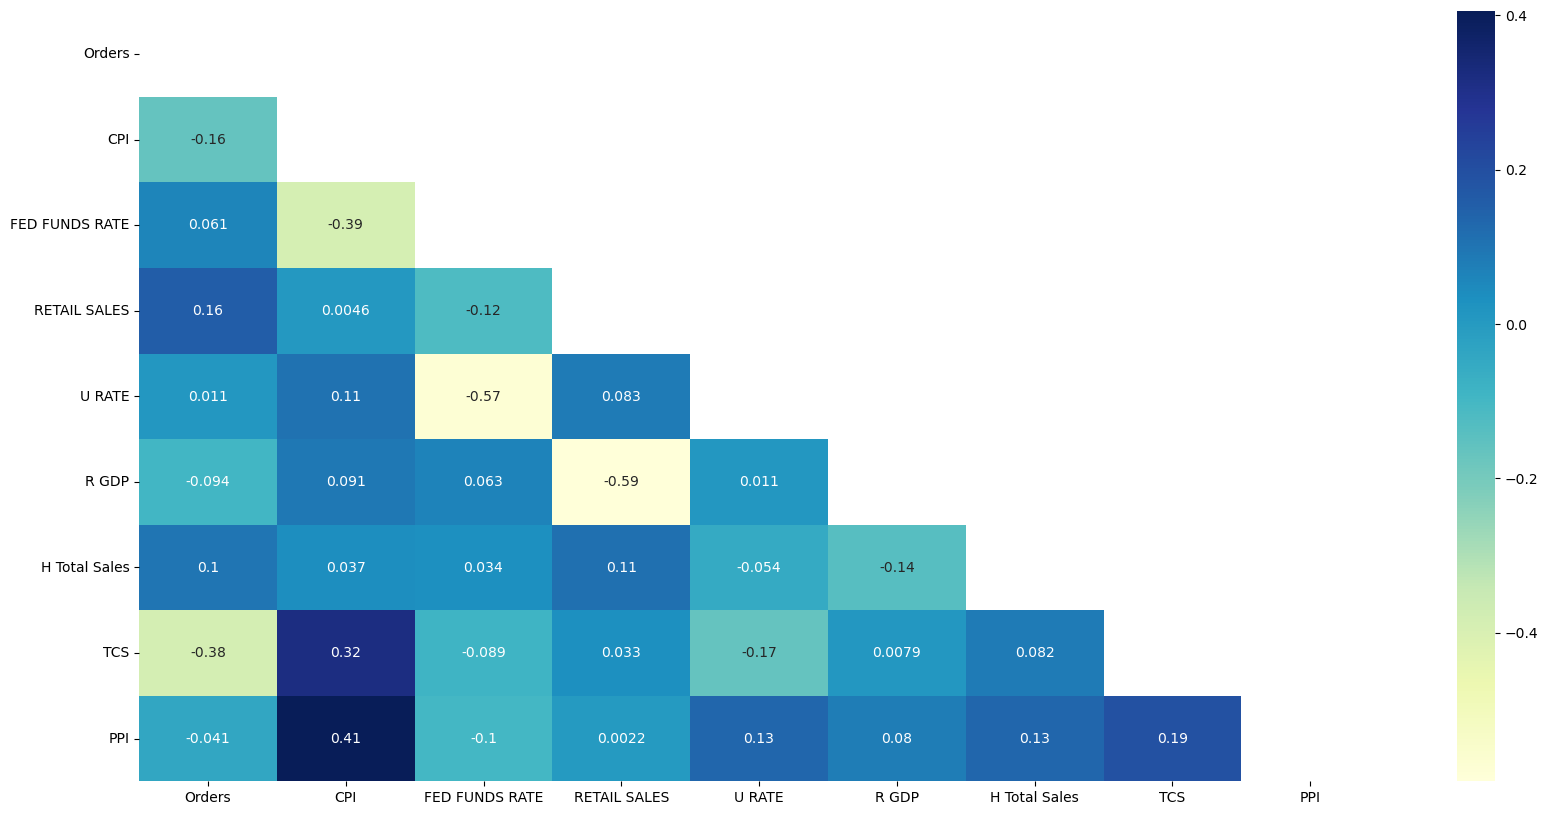

In [80]:
import matplotlib.pyplot as mp
import seaborn as sb
# new_data.iloc[:,0:9].corr().where(np.triu(np.ones(new_data.corr().shape), k=1).astype(bool))
# creating mask
mask = np.triu(np.ones_like(standardized_data.iloc[:,0:11].corr()))
 
# plotting a triangle correlation heatmap
dataplot = sb.heatmap(standardized_data.iloc[:,0:11].corr(), cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
# mp.show()

In [81]:
macro_var_lag = lag_variable(standardized_data,5)
macro_var_lag.head(10)

,Month,Orders,CPI,FED FUNDS RATE,RETAIL SALES,U RATE,R GDP,H Total Sales,TCS,PPI,...,Monthlag_5,Orderslag_5,CPIlag_5,FED FUNDS RATElag_5,RETAIL SALESlag_5,U RATElag_5,R GDPlag_5,H Total Saleslag_5,TCSlag_5,PPIlag_5
0,1/1/2018,1.266171,0.580615,0.168927,-0.870765,-0.345832,0.286800,0.476262,0.672913,1.073900,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/1/2018,-0.617705,0.352425,0.178100,-0.205212,-0.274033,0.286800,0.949831,-0.557547,0.956924,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/1/2018,0.882906,-0.205370,0.260652,-0.038824,-0.345832,0.286800,1.739382,1.971871,-1.297400,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4/1/2018,0.693607,0.225654,0.425758,1.042700,-0.345832,0.286800,-0.681259,-0.762165,0.305901,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5/1/2018,1.323791,0.276362,0.434930,-0.787571,-0.489430,0.286800,0.067678,-0.065998,0.027320,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6/1/2018,0.766773,-0.382851,0.545001,0.127564,-0.345832,0.286800,-0.851841,-1.356653,-1.884787,...,1/1/2018,1.266171,0.580615,0.168927,-0.870765,-0.345832,0.2868,0.476262,0.672913,1.073900
6,7/1/2018,0.337406,-0.763166,0.627553,0.293953,-0.489430,0.286800,-0.645518,-0.762400,-1.121035,...,2/1/2018,-0.617705,0.352425,0.178100,-0.205212,-0.274033,0.2868,0.949831,-0.557547,0.956924
7,8/1/2018,0.965350,-0.636394,0.627553,-1.120348,-0.489430,0.286800,-0.846967,-0.564002,-0.461509,...,3/1/2018,0.882906,-0.205370,0.260652,-0.038824,-0.345832,0.2868,1.739382,1.971871,-1.297400
8,9/1/2018,0.135111,-0.484268,0.664243,-0.205212,-0.561228,0.286800,-0.238558,-0.465484,-1.567793,...,4/1/2018,0.693607,0.225654,0.425758,1.042700,-0.345832,0.2868,-0.681259,-0.762165,0.305901
9,10/1/2018,0.743251,-0.332142,0.884384,0.293953,-0.489430,-0.345847,-0.595155,-1.355779,-1.809805,...,5/1/2018,1.323791,0.276362,0.434930,-0.787571,-0.489430,0.2868,0.067678,-0.065998,0.027320


In [82]:
def lag_correlation(variable):
   # combined_vars = AltoSales.merge(macro_var_lag, left_index=True, right_index=True, how='left', indicator=True)
    corr = variable.corr()['Orders'].sort_values(ascending=False)
    print(corr) 

In [83]:
lag_correlation(macro_var_lag)

Orders                 1.000000
Orderslag_5            0.651812
Orderslag_2            0.588467
Orderslag_1            0.507461
Orderslag_3            0.506438
FED FUNDS RATElag_5    0.501481
FED FUNDS RATElag_4    0.424014
Orderslag_4            0.354826
FED FUNDS RATElag_3    0.348653
FED FUNDS RATElag_2    0.255249
RETAIL SALESlag_1      0.184110
H Total Saleslag_2     0.165992
FED FUNDS RATElag_1    0.162944
RETAIL SALES           0.155991
RETAIL SALESlag_2      0.137580
RETAIL SALESlag_4      0.125423
H Total Saleslag_1     0.118522
H Total Sales          0.099781
H Total Saleslag_3     0.092759
RETAIL SALESlag_5      0.092734
H Total Saleslag_5     0.085160
FED FUNDS RATE         0.060965
H Total Saleslag_4     0.038854
U RATE                 0.010637
U RATElag_1           -0.004634
U RATElag_2           -0.017402
R GDPlag_3            -0.017976
RETAIL SALESlag_3     -0.024735
R GDPlag_4            -0.032765
PPI                   -0.041165
R GDPlag_5            -0.049883
PPIlag_4

C:\Users\Ahmad\AppData\Local\Temp\ipykernel_27484\3434202414.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



#####      FED FUNDS RATElag_3      ------------------------      0.348653
#####      H Total Saleslag_2          ---------------------------       0.165992 
#####      RETAIL SALESlag_1      ---------------------------        0.184110
#####      CPIlag_3         ---------------------------                       -0.323210 
#####      TCSlag_1            ---------------------------                   -0.463250
#####      R GDPlag_2        ---------------------------                   -0.116526

In [ ]:
# fig = px.line(standardized_data, x=standardized_data.Month, y=standardized_data.columns[0:9],
#               labels={"index": "Month"})
# fig.update_layout(title_text="Line Charts of All Variables", title_x = 0.5)
# # fig.add_vline(x=59, line_width=3, line_dash="dash", line_color="grey")
# # Show plot 
# fig.show()

In [ ]:
# import matplotlib.pyplot as mp
# import seaborn as sb
# # new_data.iloc[:,0:9].corr().where(np.triu(np.ones(new_data.corr().shape), k=1).astype(bool))
# # creating mask
# mask = np.triu(np.ones_like(standardized_data.iloc[:,0:9].corr()))
 
# # plotting a triangle correlation heatmap
# dataplot = sb.heatmap(standardized_data.iloc[:,0:9].corr(), cmap="YlGnBu", annot=True, mask=mask)
 
# # displaying heatmap
# # mp.show()

In [ ]:
# standardized_data.to_csv('standardized_data.csv', index=False)